In [22]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline

In [38]:
df = pd.read_csv('movies.csv')

In [6]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [9]:
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))

index - 0%
budget - 0%
genres - 1%
homepage - 64%
id - 0%
keywords - 9%
original_language - 0%
original_title - 0%
overview - 0%
popularity - 0%
production_companies - 0%
production_countries - 0%
release_date - 0%
revenue - 0%
runtime - 0%
spoken_languages - 0%
status - 0%
tagline - 18%
title - 0%
vote_average - 0%
vote_count - 0%
cast - 1%
crew - 0%
director - 1%


In [10]:
df = df.dropna()

In [11]:
df.drop_duplicates()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,4772,31192,Drama Action Comedy,http://downterrace.blogspot.com/,42151,murder dark comedy crime family,en,Down Terrace,After serving jail time for a mysterious crime...,1.330379,...,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You're only as good as the people you know.,Down Terrace,6.3,26,Robert Hill Robin Hill Julia Deakin David Scha...,"[{'name': 'Ben Wheatley', 'gender': 2, 'depart...",Ben Wheatley
4773,4773,27000,Comedy,http://www.miramax.com/movie/clerks/,2292,salesclerk loser aftercreditsstinger,en,Clerks,Convenience and video store clerks Dante and R...,19.748658,...,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,Brian O'Halloran Jeff Anderson Jason Mewes Kev...,"[{'name': 'Kevin Smith', 'gender': 2, 'departm...",Kevin Smith
4781,4781,22000,Comedy Romance,https://www.facebook.com/DrySpellMovie,255266,dating divorce sex scene sex comedy anti roman...,en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,...,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1,Suzi Lorraine Jared Degado Heather Dorff Racha...,"[{'name': 'Travis Legge', 'gender': 0, 'depart...",Travis Legge
4791,4791,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recent

In [42]:
df['Genres'] = df['genres'].astype(str).str[:4]
  
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,Genres
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Acti
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adve
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Acti
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Acti
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Acti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez,Acti
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns,Come
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith,Come
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,"[{""iso_639_1"": ""en"", ""name""

In [48]:
df['Rating'] = df['vote_average'].astype(int)
  
df  

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,cast,crew,director,Genres,Rating
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,Acti,7
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,Adve,6
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,Acti,6
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,Acti,7
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,Acti,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,Action Crime Thriller,NaN,9367,united states\u2013mexico barrier legs arms pa...,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,...,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,Carlos Gallardo Jaime de Hoyos Peter Marquardt...,"[{'name': 'Robert Rodriguez', 'gender': 0, 'de...",Robert Rodriguez,Acti,6
4799,4799,9000,Comedy Romance,NaN,72766,NaN,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,...,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Edward Burns Kerry Bish\u00e9 Marsha Dietlein ...,"[{'name': 'Edward Burns', 'gender': 2, 'depart...",Edward Burns,Come,5
4800,4800,0,Comedy Drama Romance TV Movie,http://www.hallmarkchannel.com/signedsealeddel...,231617,date love at first sight narration investigati...,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,Released,NaN,"Signed, Sealed, Delivered",7.0,6,Eric Mabius Kristin Booth Crystal Lowe Geoff G...,"[{'name': 'Carla Hetland', 'gender': 0, 'depar...",Scott Smith,Come,7
4801,4801,0,NaN,http://shanghaicalling.com/,126186,NaN,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,Daniel Henney Eliza Coupe Bill Paxton Alan Ruc...,"[{'name': 'Daniel Hsia', 'gender': 2, 'departm...",Daniel Hsia,nan,5


In [12]:
print(df.dtypes)

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
director                 object
dtype: object


In [15]:
df['release_date']

0       2009-12-10
1       2007-05-19
2       2015-10-26
3       2012-07-16
4       2012-03-07
           ...    
4772    2009-09-01
4773    1994-09-13
4781    2013-02-14
4791    2007-01-01
4796    2004-10-08
Name: release_date, Length: 1432, dtype: object

In [17]:
# Some of the year columns and released have different years, we will splice the released date and use that year.

df['Year'] = df['release_date'].astype(str).str[:4]
 
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,Year
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,2009
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,2007
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,2015
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,2012
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,4772,31192,Drama Action Comedy,http://downterrace.blogspot.com/,42151,murder dark comedy crime family,en,Down Terrace,After serving jail time for a mysterious crime...,1.330379,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You're only as good as the people you know.,Down Terrace,6.3,26,Robert Hill Robin Hill Julia Deakin David Scha...,"[{'name': 'Ben Wheatley', 'gender': 2, 'depart...",Ben Wheatley,2009
4773,4773,27000,Comedy,http://www.miramax.com/movie/clerks/,2292,salesclerk loser aftercreditsstinger,en,Clerks,Convenience and video store clerks Dante and R...,19.748658,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,Brian O'Halloran Jeff Anderson Jason Mewes Kev...,"[{'name': 'Kevin Smith', 'gender': 2, 'departm...",Kevin Smith,1994
4781,4781,22000,Comedy Romance,https://www.facebook.com/DrySpellMovie,255266,dating divorce sex scene sex comedy anti roman...,en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1,Suzi Lorraine Jared Degado Heather Dorff Racha...,"[{'name': 'Travis Legge', 'gender': 0, 'depart...",Travis Legge,2013
4791,4791,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recently dumpe

In [18]:
# Some of the year columns and released have different years, we will splice the released date and use that year.

df['Month'] = df['release_date'].astype(str).str[5:7]
  
df

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,cast,crew,director,Year,Month
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,2009,12
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski,2007,05
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes,2015,10
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan,2012,07
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton,2012,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,4772,31192,Drama Action Comedy,http://downterrace.blogspot.com/,42151,murder dark comedy crime family,en,Down Terrace,After serving jail time for a mysterious crime...,1.330379,...,Released,You're only as good as the people you know.,Down Terrace,6.3,26,Robert Hill Robin Hill Julia Deakin David Scha...,"[{'name': 'Ben Wheatley', 'gender': 2, 'depart...",Ben Wheatley,2009,09
4773,4773,27000,Comedy,http://www.miramax.com/movie/clerks/,2292,salesclerk loser aftercreditsstinger,en,Clerks,Convenience and video store clerks Dante and R...,19.748658,...,Released,Just because they serve you doesn't mean they ...,Clerks,7.4,755,Brian O'Halloran Jeff Anderson Jason Mewes Kev...,"[{'name': 'Kevin Smith', 'gender': 2, 'departm...",Kevin Smith,1994,09
4781,4781,22000,Comedy Romance,https://www.facebook.com/DrySpellMovie,255266,dating divorce sex scene sex comedy anti roman...,en,Dry Spell,Sasha tries to get her soon-to-be ex husband K...,0.048948,...,Released,Getting divorced does funny things to a girl,Dry Spell,6.0,1,Suzi Lorraine Jared Degado Heather Dorff Racha...,"[{'name': 'Travis Legge', 'gender': 0, 'depart...",Travis Legge,2013,02
4791,4791,13,Horror,http://tincanmanthemovie.com/,157185,home invasion,en,Tin Can Man,Recently dumped by his girlfirend for another ...,0.332679,...,Released,Everything You've Heard is True,Tin Can Man,2.0,1,Michael Parle Emma Eliza Regan Patrick O'Donne...,"[{'name': 'Ivan Kavanagh', 'gender': 0, 'depar...",Ivan Kavanagh,2007,01


In [19]:
df.sort_values(by=['revenue'], inplace=False, ascending=False)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,cast,crew,director,Year,Month
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron,2009,12
25,25,200000000,Drama Romance Thriller,http://www.titanicmovie.com,597,shipwreck iceberg ship panic titanic,en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,...,Released,Nothing on Earth could come between them.,Titanic,7.5,7562,Kate Winslet Leonardo DiCaprio Frances Fisher ...,"[{'name': 'Mali Finn', 'gender': 1, 'departmen...",James Cameron,1997,11
16,16,220000000,Science Fiction Action Adventure,http://marvel.com/avengers_movie/,24428,new york shield marvel comic superhero based o...,en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,...,Released,Some assembly required.,The Avengers,7.4,11776,Robert Downey Jr. Chris Evans Mark Ruffalo Chr...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Joss Whedon,2012,04
28,28,150000000,Action Adventure Science Fiction Thriller,http://www.jurassicworld.com/,135397,monster dna tyrannosaurus rex velociraptor island,en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,...,Released,The park is open.,Jurassic World,6.5,8662,Chris Pratt Bryce Dallas Howard Irrfan Khan Vi...,"[{'name': 'Steven Spielberg', 'gender': 2, 'de...",Colin Trevorrow,2015,06
44,44,190000000,Action,http://www.furious7.com/,168259,car race speed revenge suspense car,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,...,Released,Vengeance Hits Home,Furious 7,7.3,4176,Vin Diesel Paul Walker Dwayne Johnson Michelle...,"[{'name': 'James Wan', 'gender': 2, 'departmen...",James Wan,2015,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4139,4139,2000000,Crime Drama Horror Thriller,http://www.ninedead.com/,34335,kidnapping murder suspense,en,Nine Dead,Communication is the key to the survival for n...,9.687930,...,Released,It doesn't have to end this way,Nine Dead,5.2,84,Melissa Joan Hart John Terry Chip Bent Lawrenc...,"[{'name': 'Chris Shadley', 'gender': 0, 'depar...",Chris Shadley,2010,01
4158,4158,2000000,Thriller,http://www.screenmedia.net/project/shark-lake/,299553,lake shark attack,en,Shark Lake,Meredith Hendricks happens to be the best cop ...,1.187764,...,Released,In this lake you have to fight to survive,Shark Lake,4.4,19,Dolph Lundgren James Chalke Sara Malakul Lane ...,"[{'name': 'Dolph Lundgren', 'gender': 2, 'depa...",Jerry Dugan,2015,10
1282,1282,0,Action Adventure Thriller Drama,http://www.thehuntingpartymovie.com/,5353,civil war spy hotel journalist journalism,en,The Hunting Party,"An emerging journalist (Jesse Eisenberg), an e...",8.048305,...,Released,How can they find the world's most wanted war ...,The Hunting Party,6.6,96,Richard Gere Terrence Howard James Brolin Dian...,"[{'name': 'Beatrix Aruna Pasztor', 'gender': 1...",Richard Shepard,2007,09
3344,3344,7000000,Comedy Drama Family,http://mydogskip.warnerbros.com/,17908,mississippi childhood memory dog,en,My Dog Skip,A shy boy is unable to make friends in Yazoo C...,5.675535,...,Released,Every family needs an optimist.,My Dog Skip,6.5,69,Frankie Muniz Diane Lane Kevin Bacon Luke Wils...,"[{'name': 'William Ross', 'gender': 2, 'depart...",Jay Russell,2000,01


<AxesSubplot:>

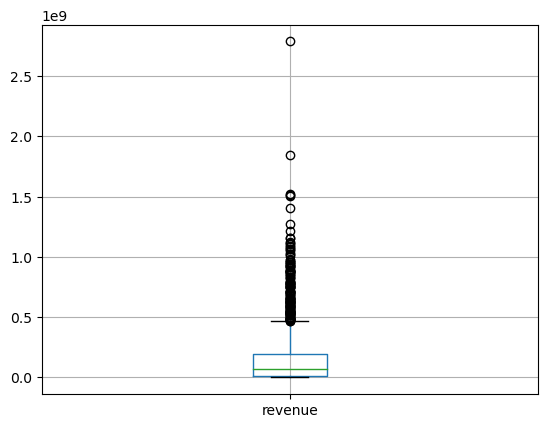

In [20]:
df.boxplot(column=['revenue'])

In [23]:
z_scores = stats.zscore(df['revenue'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
df = df[filtered_entries]

<AxesSubplot:>

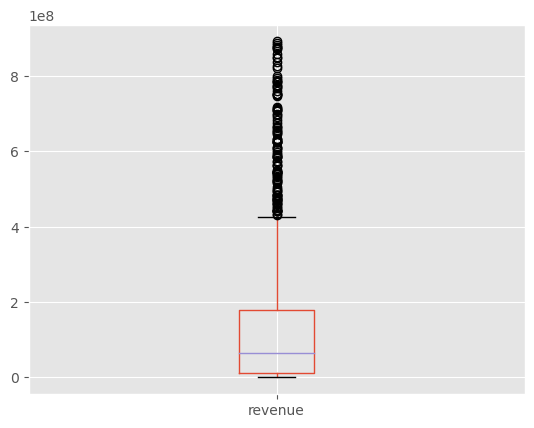

In [24]:
df.boxplot(column=['revenue'])

Text(0.5, 1.0, 'revenue vs Budget')

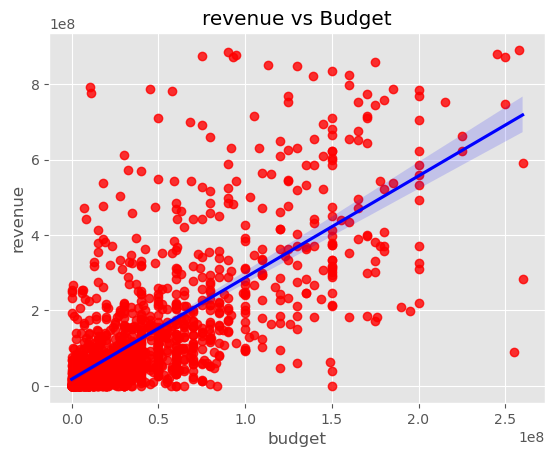

In [25]:
sns.regplot(x="budget", y="revenue", data=df, scatter_kws = {"color": "red"},line_kws = {"color": "blue"}).set_title('revenue vs Budget') 

In [26]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

C:\Users\91955\AppData\Local\Temp\ipykernel_30896\635532796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerized[col_name]= df_numerized[col_name].astype('category')
C:\Users\91955\AppData\Local\Temp\ipykernel_30896\635532796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerized[col_name] = df_numerized[col_name].cat.codes
C:\Users\91955\AppData\Local\Temp\ipykernel_30896\635532796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,status,tagline,title,vote_average,vote_count,cast,crew,director,Year,Month
2,2,245000000,11,1036,206647,1177,6,918,62,107.376788,...,1,34,915,6.3,4466,282,1315,716,55,9
4,4,260000000,27,174,49529,142,6,540,813,43.926995,...,1,642,541,6.1,2124,1275,55,36,52,2
5,5,258000000,356,1039,559,419,6,925,1143,115.699814,...,1,1005,922,5.9,3576,1296,440,718,47,4
6,6,260000000,183,56,38757,610,6,969,1342,48.681969,...,1,1149,968,7.4,3330,1389,703,107,50,10
9,9,250000000,23,387,209112,387,6,128,581,155.790452,...,1,592,130,5.7,7004,102,537,865,56,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,4772,31192,279,70,42151,831,6,290,304,1.330379,...,1,1378,294,6.3,26,1105,124,69,49,8
4773,4773,27000,194,802,2292,1054,6,224,497,19.748658,...,1,588,227,7.4,755,162,796,458,34,8
4781,4781,22000,238,1356,255266,383,6,301,985,0.048948,...,1,386,306,6.0,1,1264,1352,827,53,1
4791,4791,13,405,287,157185,605,6,1272,961,0.332679,...,1,295,1283,2.0,1,929,576,303,47,0


<AxesSubplot:>

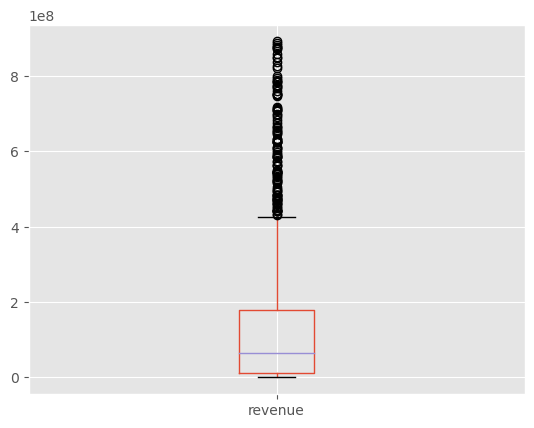

In [27]:
df.boxplot(column=['revenue'])

In [28]:
corr_mat = df_numerized.corr()

corr_pairs = corr_mat.unstack()

# Sorting the correlation pairs
sorted_pairs = corr_pairs.sort_values()

# Including only pairs that have a correlation greater than 0.5.
# A correlation coefficient of .50 or larger represents a strong or large correlation.
high_corr = sorted_pairs[(sorted_pairs) > 0.5]  

high_corr

id                    Year                    0.508658
Year                  id                      0.508658
vote_count            budget                  0.536730
budget                vote_count              0.536730
popularity            revenue                 0.595299
revenue               popularity              0.595299
                      budget                  0.723128
budget                revenue                 0.723128
revenue               vote_count              0.747742
vote_count            revenue                 0.747742
id                    release_date            0.759181
release_date          id                      0.759181
popularity            vote_count              0.777377
vote_count            popularity              0.777377
release_date          Year                    0.812654
Year                  release_date            0.812654
title                 original_title          0.962412
original_title        title                   0.962412
index     

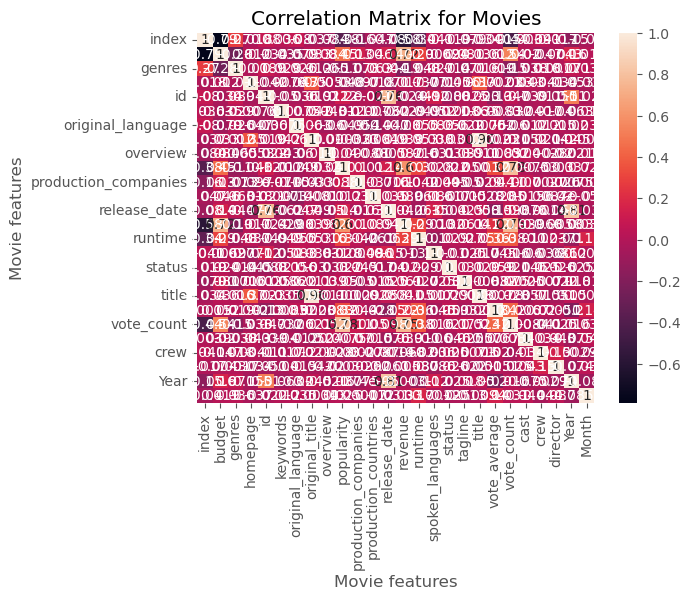

In [29]:
correlation_matrix = df_numerized.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

### Data Exploration Cont'd
While we have determined the factors contributing the most to a movie's success. There are still a few other factors we can explore.

-What is the best time of year to release a movie?
-What is the ideal runtime for a movie?
-What genre of movie had the most success on average?
-What genre of movie has the most success overall?

##### What is the best time of year to release a movie?
By grouping the Gross Earnings by Month, we can answer this question.

In [30]:
df.groupby(['Month']).mean()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director,Year
Month,,,,,,,,,,,,,,,,,,,,,
0,2412.945055,2.696538e+07,274.406593,672.219780,86593.373626,733.637363,6.164835,659.043956,632.461538,27.082298,...,150.780220,1.000000,710.230769,664.857143,5.892308,773.945055,635.164835,738.329670,419.362637,49.703297
1,1961.489583,3.380596e+07,255.770833,760.927083,60768.375000,689.041667,6.104167,696.895833,714.229167,30.859523,...,147.333333,1.000000,695.770833,699.645833,6.179167,968.916667,614.541667,779.520833,403.520833,48.854167
2,1735.388889,5.101552e+07,251.398148,687.250000,60890.129630,595.398148,6.138889,657.342593,687.101852,38.026559,...,145.990741,1.000000,714.138889,669.675926,6.313889,1476.500000,728.870370,711.018519,424.083333,48.546296
3,2120.701923,3.499231e+07,227.644231,706.673077,64486.932692,666.759615,6.134615,720.076923,661.471154,25.087160,...,153.461538,1.000000,713.673077,723.701923,6.144231,955.855769,664.471154,743.730769,427.240385,48.048077
4,1492.950495,7.057691e+07,237.297030,741.099010,51770.306931,704.752475,6.188119,707.970297,710.910891,46.194880,...,140.128713,1.000000,694.287129,717.801980,6.325743,1805.663366,720.158416,670.257426,458.069307,46.059406
5,1497.594595,6.701344e+07,231.891892,740.756757,64478.846847,677.873874,5.945946,793.576577,782.261261,42.989183,...,142.342342,1.000000,667.369369,786.054054,6.295495,1807.225225,717.540541,683.162162,477.135135,46.414414
6,1916.357724,5.007448e+07,234.065041,622.739837,67639.650407,749.463415,6.666667,731.406504,722.065041,39.098483,...,152.674797,1.000000,727.617886,701.910569,6.273171,1445.886179,707.032520,637.837398,428.219512,46.471545
7,2012.914530,3.739115e+07,238.504274,690.188034,61437.991453,671.017094,6.111111,691.401709,709.333333,29.687033,...,147.504274,1.000000,681.076923,686.880342,6.095726,965.000000,755.512821,707.282051,462.111111,47.598291
8,2450.188482,2.242916e+07,270.581152,713.392670,59247.518325,717.701571,6.068063,704.507853,659.518325,24.902925,...,149.581152,1.000000,661.015707,711.481675,6.437696,861.261780,667.167539,662.617801,414.937173,48.324607


range(1, 13)


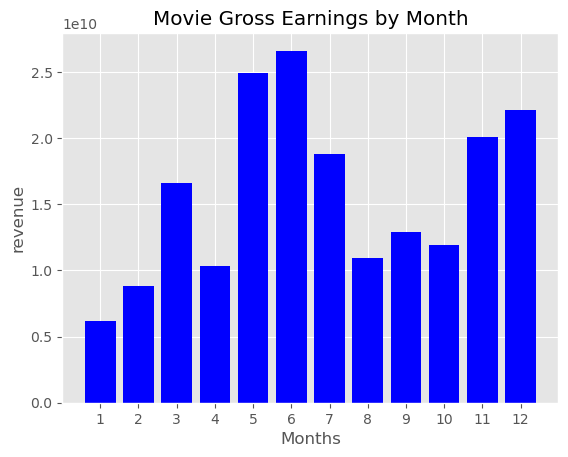

In [31]:
months = range(1,13)
print(months)

plt.bar(months,df.groupby(['Month']).sum()['revenue'], color=('blue'))
plt.xticks(months)
plt.title('Movie Gross Earnings by Month')
plt.ylabel('revenue')
plt.xlabel('Months')
plt.show()   

### Conclusion:
The best time of year to release a movie is June based on the overall gross earnings in this period.

In [32]:
gross_earnings_avg = df.groupby(['runtime'])['revenue'].mean()
gross_earnings_avg.sort_values()

runtime
0.0      0.000000e+00
73.0     0.000000e+00
161.0    6.000000e+06
75.0     1.269526e+07
63.0     1.446000e+07
             ...     
178.0    5.071542e+08
142.0    5.320752e+08
151.0    5.815538e+08
143.0    6.589284e+08
169.0    6.751200e+08
Name: revenue, Length: 102, dtype: float64

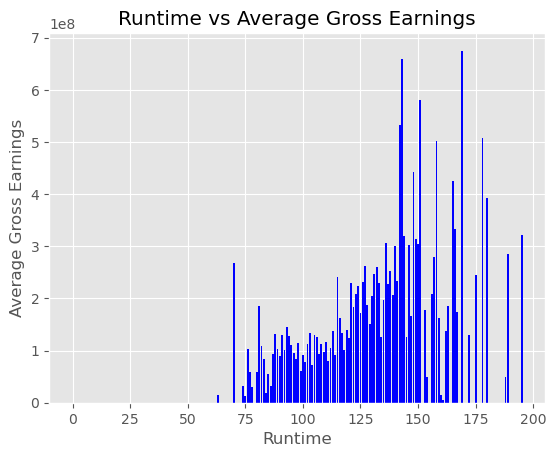

In [33]:
gross_earnings_avg = df.groupby(['runtime'])['revenue'].mean()

plt.bar(gross_earnings_avg.index, gross_earnings_avg, color="blue")

plt.xlabel('Runtime')
plt.ylabel('Average Gross Earnings')
plt.title('Runtime vs Average Gross Earnings')

plt.show()

In [39]:
df.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


### Conclusion:
The ideal runtime seems to be between 160 to 190 minutes.

#### What genre of movie has the most success overall? What genre of movie had the most success on average?

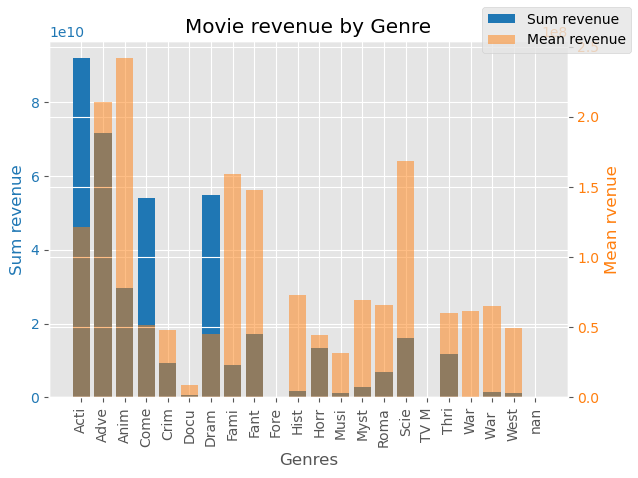

In [43]:
# Get the sum and mean of gross earnings for each genre
grouped_df = df.groupby(['Genres'])['revenue'].agg(['sum', 'mean'])
genres = grouped_df.index.tolist()
sum_gross = grouped_df['sum'].tolist()
mean_gross = grouped_df['mean'].tolist()  

# Set up the bar chart  
fig, ax1 = plt.subplots()

# Plot the bar chart for sum gross
color = 'tab:blue'
ax1.bar(genres, sum_gross, color=color, label='Sum revenue')

# Add labels and title
ax1.set_xlabel('Genres')
ax1.set_ylabel('Sum revenue', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Movie revenue by Genre')
plt.xticks(rotation=90)   
 

# Create a second y-axis for mean gross and coefficient of variation
ax2 = ax1.twinx()

# Plot the bar chart for mean gross and coefficient of variation
color = 'tab:orange'
ax2.bar(genres, mean_gross, color=color, alpha=0.5, label='Mean revenue')
#ax2.plot(genres, cv_gross, color='tab:red', marker='o', label='Coefficient of Variation')

# Add labels and title
ax2.set_ylabel('Mean rvenue', color=color)
ax2.tick_params(axis='y', labelcolor=color)   

# Add a legend  
fig.legend()

# Adjust layout
fig.tight_layout()

plt.show()

In [ ]:
#Rating vs revenue  